In [1]:
# Importing the pandas library, which provides data structures and tools for data analysis.
import pandas as pd

# Importing matplotlib.pyplot, a module within the matplotlib library, for creating static, animated, and interactive visualizations.
import matplotlib.pyplot as plt

# Importing seaborn, a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

# Importing matplotlib.cm (colormap) to handle color mapping functionalities.
import matplotlib.cm as cm

# Importing Normalize from matplotlib.colors to normalize data values into the [0.0, 1.0] range for colormap usage.
from matplotlib.colors import Normalize

# Importing ColorbarBase from matplotlib.colorbar to create a colorbar that reflects the range of data values in a plot.
from matplotlib.colorbar import ColorbarBase


In [2]:
airb = pd.read_csv('airbnb_listings.csv')

## 1 - trend 

In [3]:
#Plot review scores vs price
airb["price"] = airb["price"].str.replace('$','')
airb["price"] = airb["price"].str.replace(',','')
airb["price"] = pd.to_numeric(airb['price'])

airb = airb[airb['price'] < 8000]

I needed to clean the column price removing $ and comma to make our analyse more easy and I chose filter the range up to 8000 becouse after that there are only very exclusive cases that does not help this analyses.

in this chart is possible to see that price does not influence the score ranting directly. However, up to 1000 dollars is possible to see the most amount of dencity score ranting.

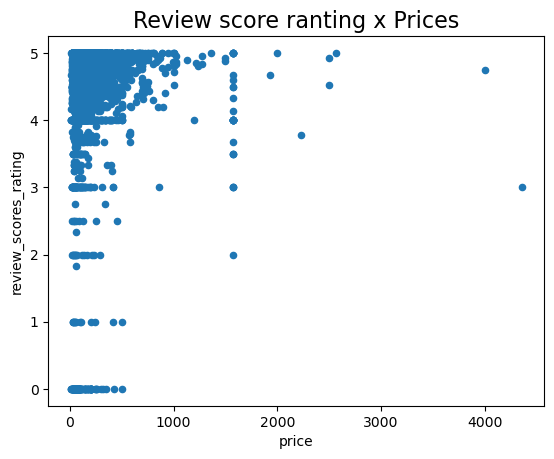

In [4]:
airb.plot.scatter ("price", "review_scores_rating")
plt.title('Review score ranting x Prices', fontsize=16)
plt.show()

## 2 - trend

In this chart below i use the longitude and latitude to discover the location and i use host_id to figure out one curious situation, there are a small group of hosts that are owners of more than one property in yellow colour, In another words in this graph is possibly to see the degree of monopoly is this rental market

<Figure size 1200x1000 with 0 Axes>

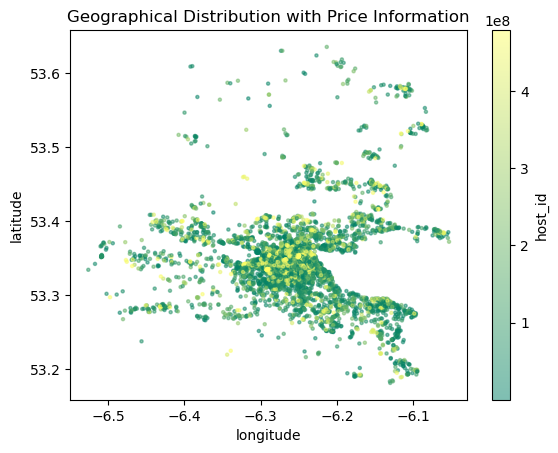

In [5]:
# Geographical distribution of waterpoints with price information
plt.figure(figsize=(12, 10))
scatter_plot = airb.plot.scatter(x='longitude', y='latitude', c='host_id', cmap='summer', s=5, alpha=0.5)
plt.title('Geographical Distribution with Price Information', fontsize=12)
plt.show()

## 3 - Trend

This boxplot shows the price divided into categories like Entire house/apt, hotel room, private room and shared room, and in this way makes the analysis easy to understand, for example, definitely shared rooms in most cases are cheaper than others, however, some hotel rooms may offer similar prices. Private rooms followed by Entire house/apt are most likely to be more volatile in terms of price. Furthermore, the curious fate is that a private room sometimes tends to be more expensive than an entire house/apartment, depending on the region. Plus, private rooms offer the highest prices on Airbnb.

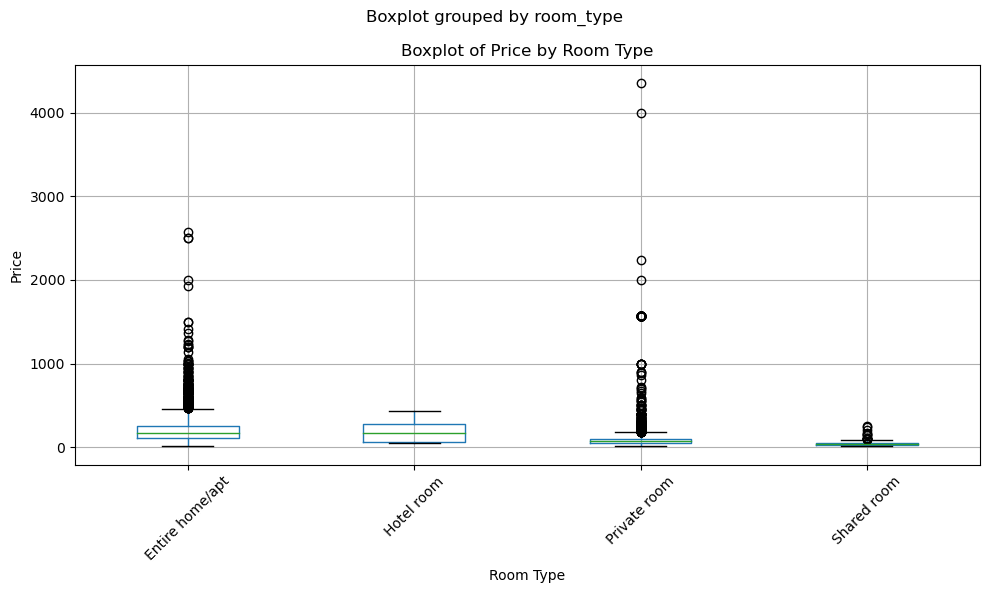

In [6]:
# Group data by 'room_type' and then plot
airb.boxplot(column='price', by='room_type', figsize=(10, 6))
plt.title('Boxplot of Price by Room Type')
plt.ylabel('Price')
plt.xlabel('Room Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


In [7]:
airb[['accommodates','bedrooms','minimum_nights','maximum_nights','price']].describe()

,accommodates,bedrooms,minimum_nights,maximum_nights,price
count,7562.000000,7357.000000,7562.000000,7562.000000,7562.000000
mean,3.004893,1.523311,6.256546,528.341973,165.777875
std,1.886223,0.917865,28.172453,517.455047,213.291838
min,1.000000,1.000000,1.000000,1.000000,10.000000
25%,2.000000,1.000000,1.000000,15.000000,65.000000
50%,2.000000,1.000000,2.000000,365.000000,105.000000
75%,4.000000,2.000000,4.000000,1125.000000,192.000000
max,16.000000,13.000000,1125.000000,1125.000000,4357.000000


above i select some columns to comment about (mean/mode/median, Interquartile ranges, standard deviation). This columns selected are the basic points looked for people who want to rent an accomodation. In addition, it shows the main points in over all data.

At last, To see the interquartile ranges of the selected columns I used the code below, the interquartile range shows the values contained in a certain range, in my case I chose ranges between 25% and 75%, this analysis is very useful to exclude outliers in a data analysis, because values found out of this range will be not considered.

Interquartile Range (IQR) for accommodates: 2.0


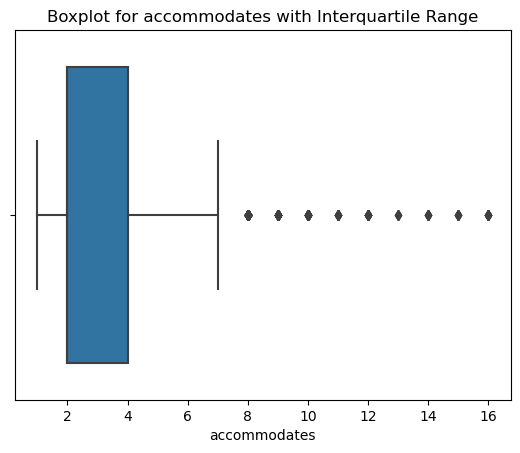

Interquartile Range (IQR) for bedrooms: 1.0


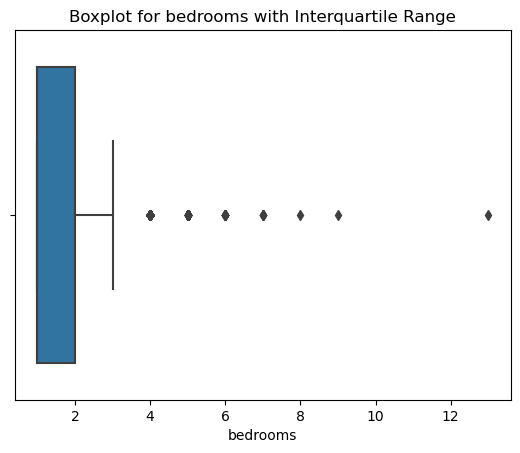

Interquartile Range (IQR) for minimum_nights: 3.0


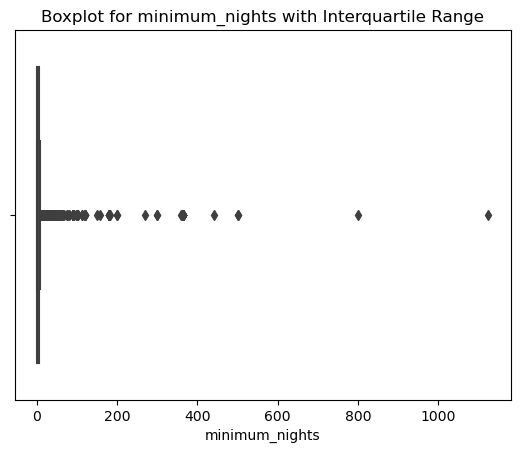

Interquartile Range (IQR) for maximum_nights: 1110.0


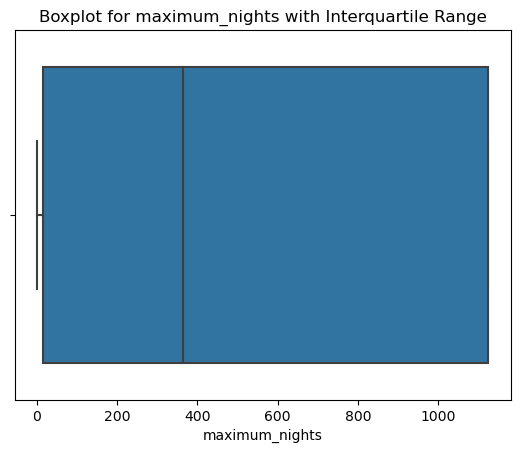

Interquartile Range (IQR) for price: 127.0


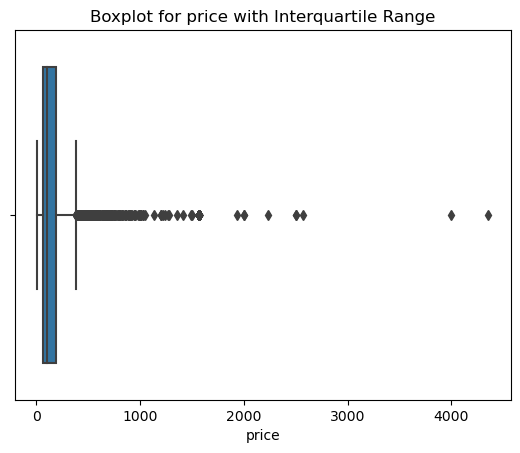

In [8]:
# Columns of interest
columns_of_interest = ['accommodates', 'bedrooms', 'minimum_nights', 'maximum_nights', 'price']

# Plotting boxplots for each column
for column in columns_of_interest:
    sns.boxplot(x=airb[column])
    
    # Compute the IQR for the current column
    Q1 = airb[column].quantile(0.25)
    Q3 = airb[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Print the IQR for the current column
    print(f"Interquartile Range (IQR) for {column}: {IQR}")
    
    plt.title(f'Boxplot for {column} with Interquartile Range')
    plt.xlabel(column)
    plt.show()



## 4 - Trend

In this graph below you can see the availability of the accomodations, in terms of the data analyzed it is possible to state that on Airbnb it is not common to find shared rooms representing 2.3%, and hotel rooms also with 0.6%. However, it is important to understand that hotels do not usually post their accommodation on the Airbnb website, they have their own private website.

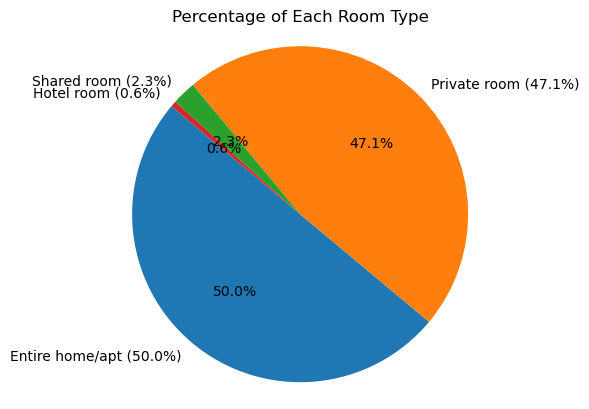

In [9]:
# Calculate the counts of each room type
room_type_counts = airb['room_type'].value_counts()

# Compute the percentage for each room type
total_rooms = len(airb)
room_type_percentages = (room_type_counts / total_rooms) * 100

# Convert to a dictionary for plotting
labels = room_type_percentages.index.tolist()
sizes = room_type_percentages.values.tolist()

# Create labels with percentages
labels_with_percentages = [f"{label} ({size:.1f}%)" for label, size in zip(labels, sizes)]

plt.pie(sizes, labels=labels_with_percentages, autopct='%1.1f%%', startangle=140)
plt.title("Percentage of Each Room Type")
plt.axis('equal')

plt.show()

## 5 - Trend

In this trend below, it is possible to see that no matter how much time the host spends responding to a request, the main criterion adopted by people in terms of evaluation is definitely not the response time.

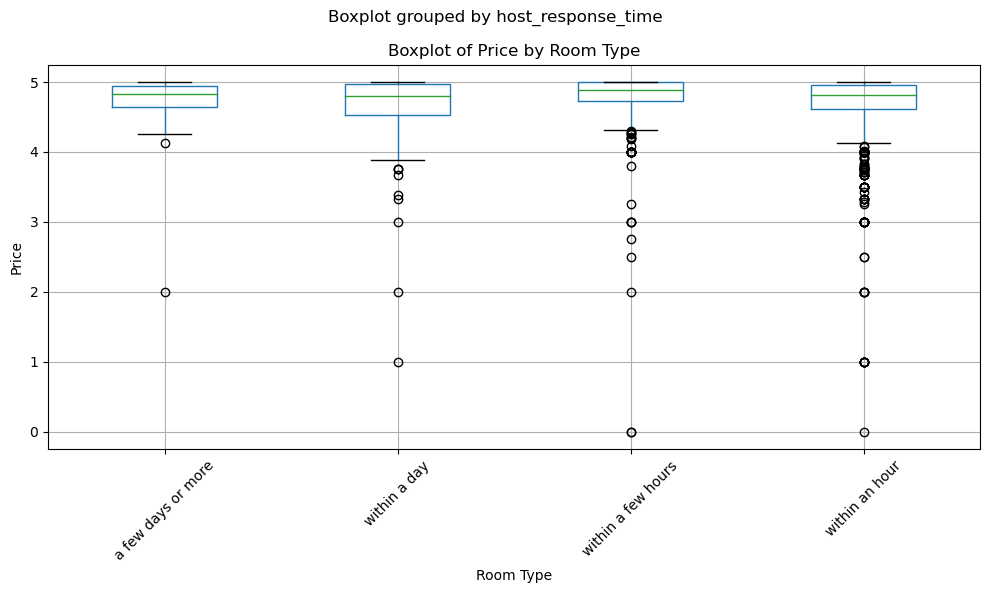

In [10]:
# Group data by 'room_type' and then plot
airb.boxplot(column='review_scores_rating', by='host_response_time', figsize=(10, 6))
plt.title('Boxplot of Price by Room Type')
plt.ylabel('Price')
plt.xlabel('Room Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

However, to find out which is the main reason that influences a good rating, my guess is that location is the main reason, assuming that all the accommodations have the minimum required by Airbnb, and also considering that all the available structure has been duly described by the host, then for me the main reason that influences the rating is location, because there are some hidden facts that you won't know until you move in, such as the neighborhood, the noise from the highways when the trucks and traffic are heavier, but the proximity of bus lines for transportation is considered an advantage, and finally my main point is the distance from the city center. This is the point, people usually go to shopping malls and restaurants, and definitely places close to these places will get the best rating. In short, my thesis is that the best places that will receive the highest score are close to the city center. To find out and prove my thesis, I'm going to create a new column and filter out only the scores above 4 and select them to show in a graphical distribution below.


In [11]:
airb['high_score'] = airb['review_scores_rating'] > 4 # create a new column with the values higher than 4
selected_data = airb[airb['high_score']]
selected_data[['latitude','longitude','high_score']]

,latitude,longitude,high_score
0,53.291780,-6.257920,True
1,53.292090,-6.256240,True
2,53.390270,-6.235470,True
3,53.283260,-6.191880,True
4,53.337440,-6.323630,True
...,...,...,...
7470,53.335616,-6.276982,True
7476,53.347910,-6.267176,True
7494,53.363159,-6.238206,True
7514,53.356362,-6.292370,True


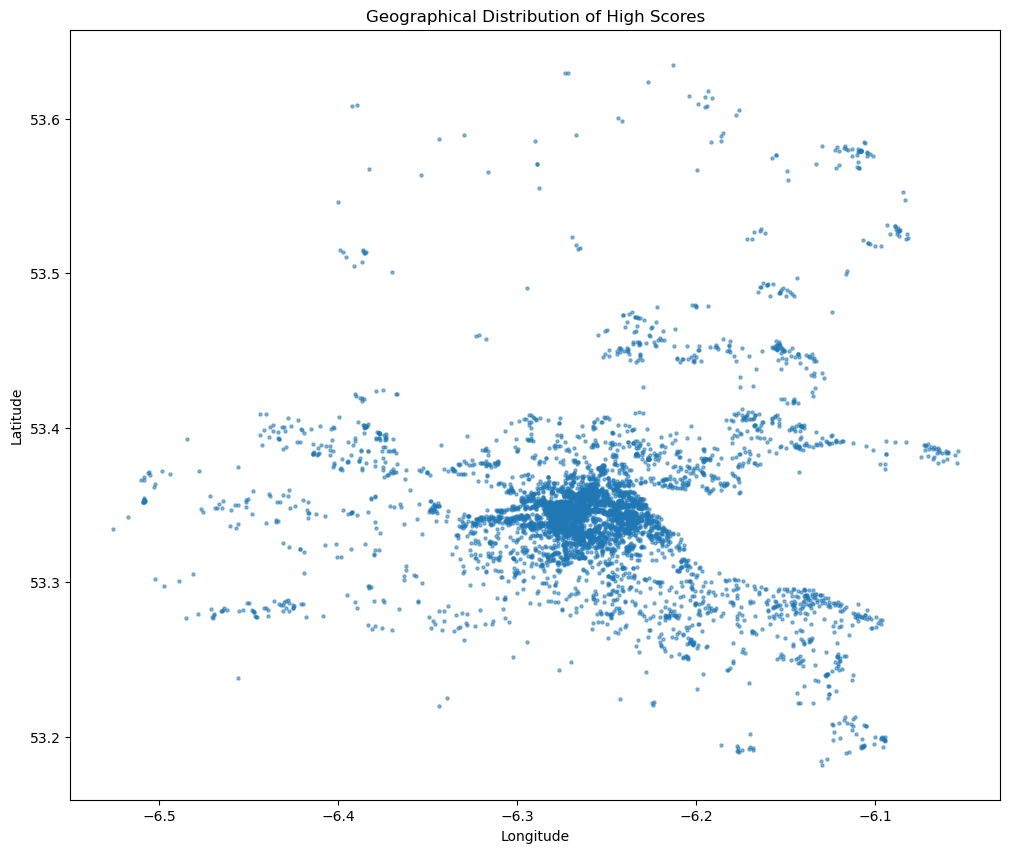

In [12]:
plt.figure(figsize=(12, 10))
plt.scatter(x=selected_data['longitude'], y=selected_data['latitude'],s=5, alpha=0.5)
plt.title('Geographical Distribution of High Scores', fontsize=12)
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Latitude', fontsize=10)
plt.show()

in this graph above is possible to see a big concentration of high scores close to the city centre proving my tesis.